Poniższe komórki powinny być odpalone zawsze

In [1]:
import cPickle as pickle
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:


typesinput = {
    'itemID': np.dtype(int),
    'categoryID': np.dtype(int),
    'title': np.dtype(str),
    'description': np.dtype(str),
    'images_array': np.dtype(str),
    'attrsJSON': np.dtype(str),
    'price': np.dtype(float),
    'locationID': np.dtype(int),
    'metroID': np.dtype(float),
    'lat': np.dtype(float),
    'lon': np.dtype(float),
}


# DESCRIPTION TF-IDFS

Generacja TF-IDF dla opisów

In [3]:

items = pd.read_csv("input/ItemInfo_train.csv", dtype=typesinput, usecols=['description'])
itemstest = pd.read_csv("input/ItemInfo_test.csv", dtype=typesinput, usecols=['description'])
items.fillna("", inplace=True)
itemstest.fillna("", inplace=True)

In [4]:

# Sprawdz tf-idf bez stopwordsow
tfidf = TfidfVectorizer(stop_words = stopwords.words('russian')).fit(pd.concat([items.description, itemstest.description]))

In [ ]:
# transf = tfidf.transform(items.description)
pickle.dump(transf, open("tfidfs/description_stopwords_train.data","w"))

In [ ]:
transf = tfidf.transform(itemstest.description)
pickle.dump(transf, open("tfidfs/description_stopwords_test.data","w"))

# TITLE TF-IDFS

Generacja TF-IDF dla tytułów

In [ ]:

items = pd.read_csv("input/ItemInfo_train.csv", dtype=typesinput, usecols=['title'])
itemstest = pd.read_csv("input/ItemInfo_test.csv", dtype=typesinput, usecols=['title'])
items.fillna("", inplace=True)
itemstest.fillna("", inplace=True)

In [ ]:

tfidf = TfidfVectorizer(stop_words = stopwords.words('russian')).fit(pd.concat([items.title, itemstest.title]))
transf = tfidf.transform(items.title)
pickle.dump(transf, open("tfidfs/title_stopwords_train.data","w"))
transf = tfidf.transform(itemstest.title)
pickle.dump(transf, open("tfidfs/title_stopwords_test.data","w"))

In [ ]:

tfidf = TfidfVectorizer().fit(pd.concat([items.title, itemstest.title]))
transf = tfidf.transform(items.title)
pickle.dump(transf, open("tfidfs/title_train.data","w"))
transf = tfidf.transform(itemstest.title)
pickle.dump(transf, open("tfidfs/title_test.data","w"))

# COSINE 

Liczenie podobieństwa cosinusowego

In [4]:
types1 = {
        'itemID_1': np.dtype(int),
        'itemID_2': np.dtype(int),
        'isDuplicate': np.dtype(int),
        'generationMethod': np.dtype(int),
}


In [3]:

pairs = pd.read_csv("input/ItemPairs_test.csv", dtype=types1)
tfidfs_desc = pickle.load(open("tfidfs/description_stopwords_test.data","r"))
itemstest = pd.read_csv("input/ItemInfo_test.csv", dtype=typesinput, usecols=['itemID'])

In [9]:
index_ = pd.Index(itemstest.itemID)
pairs.itemID_1 = pairs.apply(lambda x: index_.get_loc(x['itemID_1']), axis=1)
pairs.itemID_2 = pairs.apply(lambda x: index_.get_loc(x['itemID_2']), axis=1)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

def cosine_sim(itemid1, itemid2):
    return cosine(tfidfs_desc[itemid1], tfidfs_desc[itemid2])

#vecfunc = np.vectorize(cosine_sim)
#res = vecfunc(pairs['itemID_1'], pairs['itemID_2'])
    

In [50]:
test_simil = pd.Series(res)

In [52]:
test_simil.to_csv("similarities/test_description_stopwords_cosine.csv")

In [5]:
pairs = pd.read_csv("input/ItemPairs_train.csv", dtype=types1)
tfidfs_desc = pickle.load(open("tfidfs/description_stopwords_train.data","r"))
itemstest = pd.read_csv("input/ItemInfo_train.csv", dtype=typesinput, usecols=['itemID'])

In [7]:
index_ = pd.Index(itemstest.itemID)
pairs.itemID_1 = pairs.apply(lambda x: index_.get_loc(x['itemID_1']), axis=1)
pairs.itemID_2 = pairs.apply(lambda x: index_.get_loc(x['itemID_2']), axis=1)

vecfunc = np.vectorize(cosine_sim)
res = vecfunc(pairs['itemID_1'], pairs['itemID_2'])

In [9]:
train_simil = pd.Series(res)

In [10]:
train_simil.to_csv("similarities/train_description_stopwords_cosine.csv")

In [11]:
train_simil.shape

(2991396,)

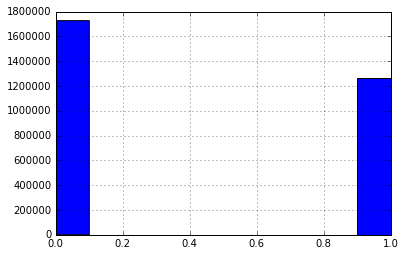

In [23]:
pairs.isDuplicate.hist()

In [22]:
%matplotlib inline

In [25]:
pairs.shape

(2991396, 4)

In [26]:
pairst = pd.read_csv("input/ItemPairs_test.csv", dtype=types1)

In [28]:
pairst.shape

(1044196, 3)